## 템플릿 매칭
![img](https://i.ibb.co/S3NMk6p/BxlAAAT.png)

- 템플릿 매칭은 위와 같이 원본 이미지에서 템플릿(샘플)이미지와 일치하는 영역을 찾는 알고리즘입니다.
템플릿 이미지를 왼쪽 상단부터 옮겨가며 원본 이미지와 템플릿 이미지를 비교합니다.

- `cv2.matchTemplate()` 함수는 위와 같은 방식으로 원본 이미지의 우측 하단까지 비교를 수행한 후
'cv2.minMaxLoc()' 함수를 이용해 결과값의 최댓값과 최솟값을 얻을 수 있습니다.


- 원본 이미지와 템플릿 이미지를 비교하는 연산 방법에는 여러가지가 있고,
템플릿 매칭을 수행하는 OpenCV 함수 `cv2.matchTemplate()` 의 파라미터로 연산의 종류를 결정할 수 있습니다.
- 연산 방법에 따라 결과값의 최솟값이 원하는 값일 수도, 최댓값이 원하는 값일 수도 있습니다.

In [6]:
import cv2
import matplotlib.pyplot as plt

In [7]:
img = cv2.imread('./img/template_match_and_Haar-like Feature/template_origin.png')
template = cv2.imread('./img/template_match_and_Haar-like Feature/template.png')

# 템플릿 이미지 크기 가져오기
template_h , template_w = template.shape[:2]

In [8]:
img_draw = img.copy()
# 템플릿 매칭
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
# 최대, 최솟값과 그 좌표
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
match_val = max_val

In [9]:
# 매칭된 자표 구해서 사각형 표시
bottom_right = (top_left[0] + template_w, top_left[1] + template_h)
cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
# 매칭 점수 표시
cv2.putText(img_draw, str(match_val), top_left, cv2.FONT_HERSHEY_PLAIN, 2,(0,0,0), 1, cv2.LINE_AA)

array([[[ 85,  87, 157],
        [ 95,  96, 164],
        [101,  97, 163],
        ...,
        [218, 220, 214],
        [218, 220, 214],
        [218, 220, 214]],

       [[ 96,  98, 162],
        [105, 105, 169],
        [110, 107, 169],
        ...,
        [218, 220, 214],
        [218, 220, 214],
        [218, 220, 214]],

       [[106, 110, 163],
        [112, 114, 168],
        [118, 116, 168],
        ...,
        [218, 219, 215],
        [218, 220, 214],
        [219, 221, 215]],

       ...,

       [[ 96, 142, 176],
        [ 94, 141, 173],
        [ 93, 140, 172],
        ...,
        [181, 201, 206],
        [181, 201, 206],
        [181, 201, 206]],

       [[ 97, 146, 178],
        [ 95, 144, 176],
        [ 93, 142, 174],
        ...,
        [180, 200, 205],
        [180, 200, 205],
        [180, 200, 205]],

       [[ 98, 149, 181],
        [ 96, 147, 179],
        [ 93, 145, 175],
        ...,
        [179, 199, 204],
        [179, 199, 204],
        [179, 199, 204]]

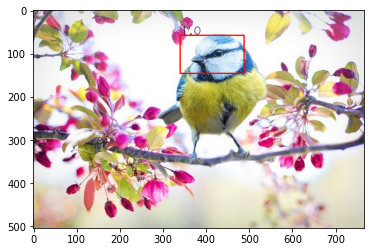

In [10]:
# 이미지 표시
img_draw = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)
plt.imshow(img_draw)